In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('drive/MyDrive/MyDrive/Data/Temp_Provincias.csv', sep=';', decimal='.')

In [4]:
df.head()

,FECHA,Provincia,T. Máxima,T.Mínima
0,01/01/2018,Madrid,11.6,3.6
1,02/01/2018,Madrid,13.4,7.5
2,03/01/2018,Madrid,13.5,7.6
3,04/01/2018,Madrid,13.7,7.8
4,05/01/2018,Madrid,11.5,5.8


In [5]:
df.FECHA=pd.to_datetime(df.FECHA, format="%d/%m/%Y")

In [6]:
df.set_index('FECHA').resample('W')

In [7]:
df.head()

,FECHA,Provincia,T. Máxima,T.Mínima
0,2018-01-01,Madrid,11.6,3.6
1,2018-01-02,Madrid,13.4,7.5
2,2018-01-03,Madrid,13.5,7.6
3,2018-01-04,Madrid,13.7,7.8
4,2018-01-05,Madrid,11.5,5.8


In [8]:
df.columns

Index(['FECHA', 'Provincia', 'T. Máxima', 'T.Mínima'], dtype='object')

In [9]:
df = df.set_index('FECHA')
df.head()

,Provincia,T. Máxima,T.Mínima
FECHA,,,
2018-01-01,Madrid,11.6,3.6
2018-01-02,Madrid,13.4,7.5
2018-01-03,Madrid,13.5,7.6
2018-01-04,Madrid,13.7,7.8
2018-01-05,Madrid,11.5,5.8


In [10]:
girona_df = df[df["Provincia"] == "Girona"]
#df[valencia_df]

In [11]:
girona_df.head()

,Provincia,T. Máxima,T.Mínima
FECHA,,,
2018-01-01,Girona,20.4,3.5
2018-01-02,Girona,20.5,3.6
2018-01-03,Girona,20.6,3.7
2018-01-04,Girona,22.2,4.0
2018-01-05,Girona,19.7,2.9


In [12]:
girona_df.columns

Index(['Provincia', 'T. Máxima', 'T.Mínima'], dtype='object')

In [13]:
girona_df['Temp_Media'] = girona_df[['T. Máxima','T.Mínima']].mean(axis=1)
girona_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Provincia,T. Máxima,T.Mínima,Temp_Media
FECHA,,,,
2018-01-01,Girona,20.4,3.5,11.95
2018-01-02,Girona,20.5,3.6,12.05
2018-01-03,Girona,20.6,3.7,12.15
2018-01-04,Girona,22.2,4.0,13.10
2018-01-05,Girona,19.7,2.9,11.30


In [14]:
girona_df.head()

,Provincia,T. Máxima,T.Mínima,Temp_Media
FECHA,,,,
2018-01-01,Girona,20.4,3.5,11.95
2018-01-02,Girona,20.5,3.6,12.05
2018-01-03,Girona,20.6,3.7,12.15
2018-01-04,Girona,22.2,4.0,13.10
2018-01-05,Girona,19.7,2.9,11.30


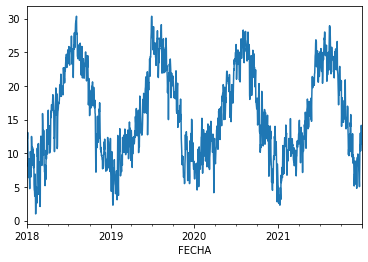

In [15]:
girona_df['Temp_Media'].plot()

In [16]:
# create timeseries readable by fbprophet
ts = pd.DataFrame({'ds':girona_df.index,'y':girona_df.Temp_Media})
#ts['cap'] = 30000 # unused in linear growth
#ts['floor'] = 0 # unused in linear growth
ts.head()

,ds,y
FECHA,,
2018-01-01,2018-01-01,11.95
2018-01-02,2018-01-02,12.05
2018-01-03,2018-01-03,12.15
2018-01-04,2018-01-04,13.10
2018-01-05,2018-01-05,11.30


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


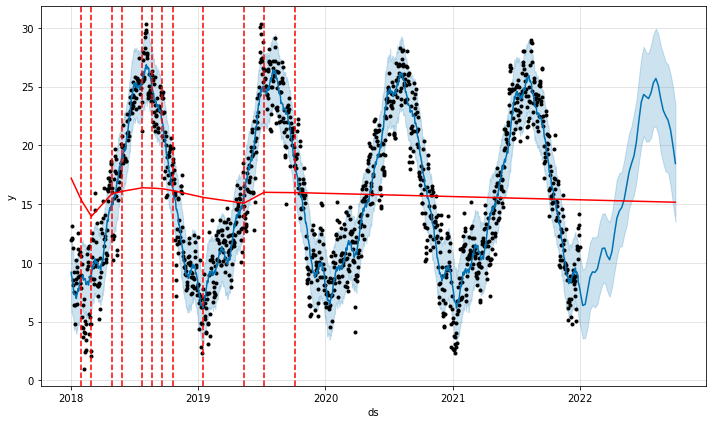

In [17]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
# instantiate the model and fit the timeseries
prophet = Prophet(changepoint_range=0.5,changepoint_prior_scale=0.5)
prophet.fit(ts)

# create a future data frame 
future = prophet.make_future_dataframe(periods=40, freq='W') #documentación para ver cómo poner semanas
forecast = prophet.predict(future)

# display the most critical output columns from the forecast
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

# plot
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),prophet,forecast)
#fig

In [18]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2018-01-01,9.195844,6.352853,12.083577
1,2018-01-02,8.881977,5.782711,11.881529
2,2018-01-03,8.820058,5.900493,11.871757
3,2018-01-04,8.588676,5.570067,11.557903
4,2018-01-05,8.380306,5.470548,11.173512


In [19]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1496,2022-09-04,15.175491,17.753153,27.101585,11.834183,18.724933,7.335386,7.335386,7.335386,0.167982,0.167982,0.167982,7.167404,7.167404,7.167404,0.0,0.0,0.0,22.510877
1497,2022-09-11,15.170221,17.671141,26.883397,11.721758,18.839727,6.958067,6.958067,6.958067,0.167982,0.167982,0.167982,6.790085,6.790085,6.790085,0.0,0.0,0.0,22.128288
1498,2022-09-18,15.164950,16.608073,26.056115,11.507274,19.023168,6.151484,6.151484,6.151484,0.167982,0.167982,0.167982,5.983502,5.983502,5.983502,0.0,0.0,0.0,21.316434
1499,2022-09-25,15.159679,15.017248,24.981142,11.359761,19.163018,4.820818,4.820818,4.820818,0.167982,0.167982,0.167982,4.652836,4.652836,4.652836,0.0,0.0,0.0,19.980498
1500,2022-10-02,15.154409,13.489470,23.470172,11.221213,19.328624,3.298574,3.298574,3.298574,0.167982,0.167982,0.167982,3.130592,3.130592,3.130592,0.0,0.0,0.0,18.452983


In [20]:
# Guardamos el resultado en un fichero csv separado por comas. 
forecast.to_csv('temp_girona.csv',  index=False, sep=";", decimal=",")